# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
# Проведем первичный анализ датасетов
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')
datasets = [train, test, full]
for i in datasets:
    i.info()
    display(i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
# Заменим тип данных для даты
for i in datasets: 
    i['date'] = pd.to_datetime(i['date'], format = '%Y-%m-%d %H:%M:%S')
    i.info()
    display(i.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant     

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
ro

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant     

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Произведем расчет эффективности обогашения и найдем MAE с исходными значениями
train['rougher.output.recovery_calculate'] = (train['rougher.output.concentrate_au']*100*(train['rougher.input.feed_au'] - train['rougher.output.tail_au'])/(train['rougher.input.feed_au']*(train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])))
mae =  (train['rougher.output.recovery'] - train['rougher.output.recovery_calculate']).abs().mean()
print(mae)


1.1290254018238898e-14


В ходе выполнения данного пункта был произведен расчет эффективности обогащения и проведено сравнение с уже данными значениями. Характеристика MAE оказалась очень мала, что говорит о хорошей точности рачета эффективности обогащения и ее зависимости от других табличных характеристик. Стоит отметить, что стандартным методом sklearn для поиска mae воспользоваться не удалось (не обрабатывались nan и inf).

In [5]:
train_column = list(train.columns)
test_column = list(test.columns)
different_col = []
c = 0
c1 = 0
k = 0
k1 = 0
for i in train_column:
    if test_column.count(i) == 0:
        different_col.append(i)
print(different_col)
print('Всего различающихся столбцов', len(different_col))
substring = 'output'
substring1 ='calculation'
for i in different_col:
    if substring in i:
        c += 1
    if substring1 in i:
        c1 += 1

for i in train_column:
    if substring in i:
        k += 1
    if substring1 in i:
        k1 += 1
print(c, 'различающихся столбцов c output')
print(k, 'столбцов c output в таблице train')
print(c1, 'различающихся столбцов c calculation')        
print(k1, 'столбцов c calculation в таблице train')        

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

В тестовой таблице недоступно 34 фичи по сравнению с обучающей. 30 из них - параметры продукта на разных стадиях и 4 - расчетные характеристики.

In [6]:
# Напишем цикл для замены пустых значений средним между соседними
datasets_with_date = [train, test, full]
for dataset in datasets_with_date:   
    for column in dataset.columns:
        dataset[column] = dataset[column].fillna(-3)
        for i in range(1,dataset[column].shape[0]):
            if dataset.loc[i,column] == -3:
                s1_s2_list = []
                s1 = dataset.loc[i-1,column]
                s1_s2_list.append(s1)
                s2 = dataset.loc[i+1,column]
                s1_s2_list.append(s2)
                if s1_s2_list[1] == -3:
                    s1_s2_list[1] = s1_s2_list[0]
                s1_s2_mean = np.mean(s1_s2_list)
                dataset.loc[i, column] = s1_s2_mean
    print(dataset.info())
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant     

Отсутствующие значения преобразованы в соответствии с реальным техпроцессом и заменены средним значением между соседними, поскольку являются наиболее близкими по значению во временном интервале. Данная замена ресурсоемка, однако отражает более точные характеристики, чем замена 0 или средним по всему признаку.

# 2. Анализ данных

count    22716.000000
mean        10.844230
std          4.407849
min          0.000000
25%         10.110454
50%         11.774115
75%         13.609712
max         24.480271
Name: rougher.output.concentrate_ag, dtype: float64
count    22716.000000
mean         7.665984
std          3.134621
min          0.000000
25%          6.756166
50%          8.256022
75%          9.690168
max         16.081632
Name: primary_cleaner.output.concentrate_ag, dtype: float64
count    22716.000000
mean         4.768127
std          2.042111
min          0.000000
25%          4.011171
50%          4.949683
75%          5.857985
max         16.001945
Name: final.output.concentrate_ag, dtype: float64


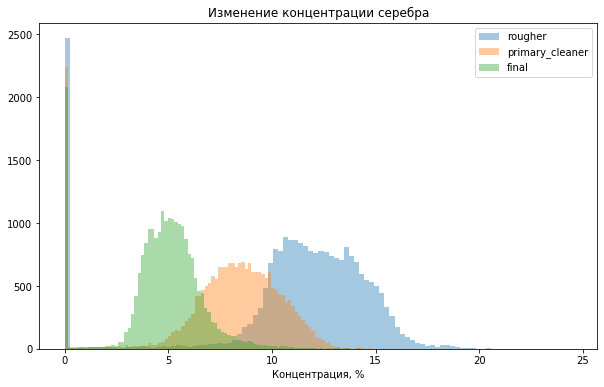

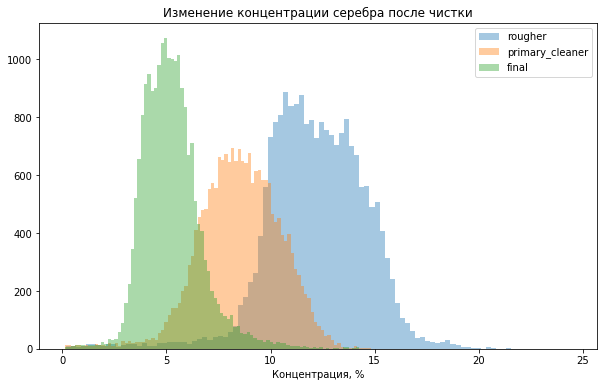

45      2016-01-16 21:00:00
46      2016-01-16 22:00:00
47      2016-01-16 23:00:00
48      2016-01-17 00:00:00
49      2016-01-17 01:00:00
                ...        
18216   2018-02-11 23:59:59
18217   2018-02-12 00:59:59
18218   2018-02-12 01:59:59
18219   2018-02-12 02:59:59
18220   2018-02-12 03:59:59
Name: date, Length: 2009, dtype: datetime64[ns]

19      2016-01-15 19:00:00
22      2016-01-15 22:00:00
30      2016-01-16 06:00:00
73      2016-01-18 01:00:00
76      2016-01-18 04:00:00
                ...        
17926   2018-01-30 21:59:59
17941   2018-01-31 12:59:59
17942   2018-01-31 13:59:59
18002   2018-02-03 01:59:59
18136   2018-02-08 15:59:59
Name: date, Length: 1682, dtype: datetime64[ns]

99      2016-01-19 03:00:00
100     2016-01-19 04:00:00
101     2016-01-19 05:00:00
102     2016-01-19 06:00:00
103     2016-01-19 07:00:00
                ...        
17912   2018-01-30 07:59:59
17913   2018-01-30 08:59:59
17914   2018-01-30 09:59:59
17915   2018-01-30 10:59:59
17916   2018-01-30 11:59:59
Name: date, Length: 1671, dtype: datetime64[ns]

count    22716.000000
mean         6.885679
std          2.831107
min          0.000000
25%          6.364943
50%          7.570378
75%          8.477461
max         18.394042
Name: rougher.output.concentrate_pb, dtype: float64
count    22716.000000
mean         8.813940
std          3.781406
min          0.000000
25%          7.629592
50%          9.879568
75%         11.233374
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64
count    22716.000000
mean         9.070917
std          3.260181
min          0.000000
25%          8.737171
50%          9.909017
75%         10.926527
max         17.031899
Name: final.output.concentrate_pb, dtype: float64


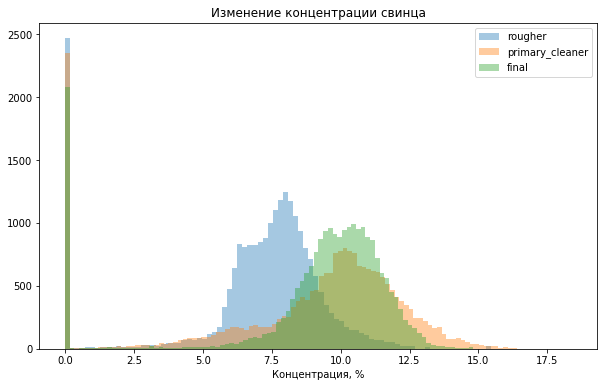

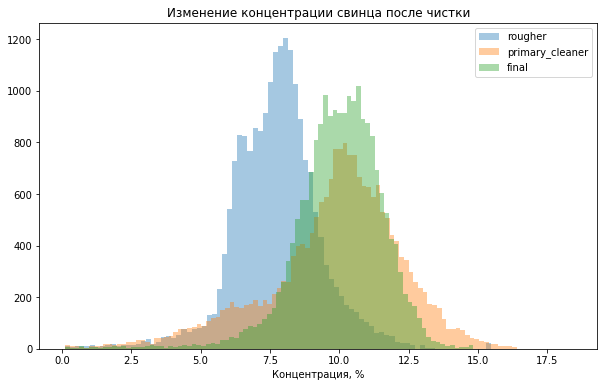

45      2016-01-16 21:00:00
46      2016-01-16 22:00:00
47      2016-01-16 23:00:00
48      2016-01-17 00:00:00
49      2016-01-17 01:00:00
                ...        
18216   2018-02-11 23:59:59
18217   2018-02-12 00:59:59
18218   2018-02-12 01:59:59
18219   2018-02-12 02:59:59
18220   2018-02-12 03:59:59
Name: date, Length: 2009, dtype: datetime64[ns]

19      2016-01-15 19:00:00
22      2016-01-15 22:00:00
30      2016-01-16 06:00:00
73      2016-01-18 01:00:00
76      2016-01-18 04:00:00
                ...        
17926   2018-01-30 21:59:59
17941   2018-01-31 12:59:59
17942   2018-01-31 13:59:59
18002   2018-02-03 01:59:59
18136   2018-02-08 15:59:59
Name: date, Length: 1781, dtype: datetime64[ns]

99      2016-01-19 03:00:00
100     2016-01-19 04:00:00
101     2016-01-19 05:00:00
102     2016-01-19 06:00:00
103     2016-01-19 07:00:00
                ...        
17912   2018-01-30 07:59:59
17913   2018-01-30 08:59:59
17914   2018-01-30 09:59:59
17915   2018-01-30 10:59:59
17916   2018-01-30 11:59:59
Name: date, Length: 1670, dtype: datetime64[ns]

count    22716.000000
mean        17.828958
std          6.843825
min          0.000000
25%         17.891703
50%         19.994740
75%         21.561806
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64
count    22716.000000
mean        29.115255
std         10.651221
min          0.000000
25%         29.334375
50%         32.344131
75%         34.761637
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64
count    22716.000000
mean        39.890135
std         13.538006
min          0.000000
25%         42.352597
50%         44.638888
75%         46.106662
max         53.611374
Name: final.output.concentrate_au, dtype: float64


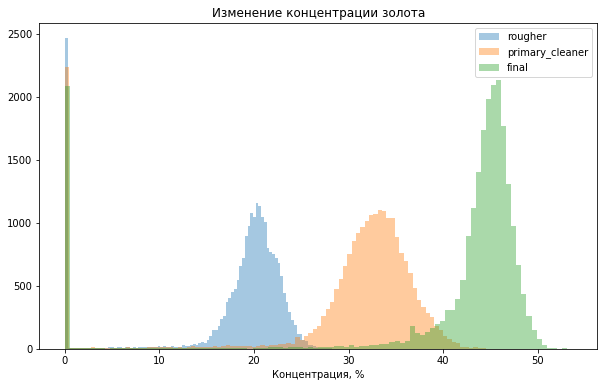

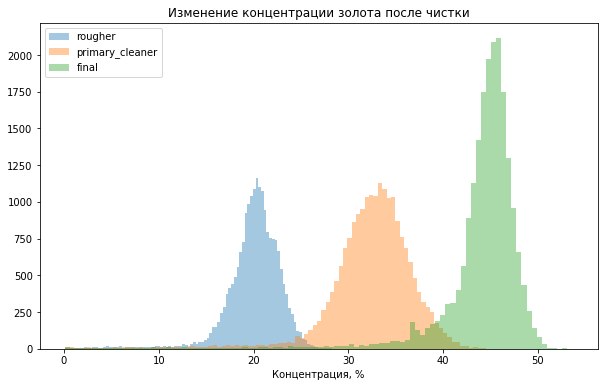

45      2016-01-16 21:00:00
46      2016-01-16 22:00:00
47      2016-01-16 23:00:00
48      2016-01-17 00:00:00
49      2016-01-17 01:00:00
                ...        
18216   2018-02-11 23:59:59
18217   2018-02-12 00:59:59
18218   2018-02-12 01:59:59
18219   2018-02-12 02:59:59
18220   2018-02-12 03:59:59
Name: date, Length: 2009, dtype: datetime64[ns]

19      2016-01-15 19:00:00
22      2016-01-15 22:00:00
30      2016-01-16 06:00:00
73      2016-01-18 01:00:00
76      2016-01-18 04:00:00
                ...        
17926   2018-01-30 21:59:59
17941   2018-01-31 12:59:59
17942   2018-01-31 13:59:59
18002   2018-02-03 01:59:59
18136   2018-02-08 15:59:59
Name: date, Length: 1682, dtype: datetime64[ns]

99      2016-01-19 03:00:00
100     2016-01-19 04:00:00
101     2016-01-19 05:00:00
102     2016-01-19 06:00:00
103     2016-01-19 07:00:00
                ...        
17912   2018-01-30 07:59:59
17913   2018-01-30 08:59:59
17914   2018-01-30 09:59:59
17915   2018-01-30 10:59:59
17916   2018-01-30 11:59:59
Name: date, Length: 1670, dtype: datetime64[ns]

In [7]:
plt.figure(figsize = (10,6))
sns.distplot(full['rougher.output.concentrate_ag'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full['primary_cleaner.output.concentrate_ag'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full['final.output.concentrate_ag'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации серебра')

plt.figure(figsize = (10,6))
sns.distplot(full[full['rougher.output.concentrate_ag'] > 0.1]['rougher.output.concentrate_ag'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full[full['primary_cleaner.output.concentrate_ag'] > 0.1]['primary_cleaner.output.concentrate_ag'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full[full['final.output.concentrate_ag'] > 0.1]['final.output.concentrate_ag'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации серебра после чистки')

print(full['rougher.output.concentrate_ag'].describe())
print(full['primary_cleaner.output.concentrate_ag'].describe())
print(full['final.output.concentrate_ag'].describe())
plt.show()
display(full[full['rougher.output.concentrate_ag'] == 0]['date'])
display(full[full['primary_cleaner.output.concentrate_ag'] == 0]['date'])
display(full[full['final.output.concentrate_ag'] == 0]['date'])

plt.figure(figsize = (10,6))
sns.distplot(full['rougher.output.concentrate_pb'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full['primary_cleaner.output.concentrate_pb'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full['final.output.concentrate_pb'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации свинца')

plt.figure(figsize = (10,6))
sns.distplot(full[full['rougher.output.concentrate_pb'] > 0.1]['rougher.output.concentrate_pb'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full[full['primary_cleaner.output.concentrate_pb'] > 0.1]['primary_cleaner.output.concentrate_pb'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full[full['final.output.concentrate_pb'] > 0.1]['final.output.concentrate_pb'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации свинца после чистки')

print(full['rougher.output.concentrate_pb'].describe())
print(full['primary_cleaner.output.concentrate_pb'].describe())
print(full['final.output.concentrate_pb'].describe())
plt.show()
display(full[full['rougher.output.concentrate_pb'] == 0]['date'])
display(full[full['primary_cleaner.output.concentrate_pb'] == 0]['date'])
display(full[full['final.output.concentrate_pb'] == 0]['date'])

plt.figure(figsize = (10,6))
sns.distplot(full['rougher.output.concentrate_au'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full['primary_cleaner.output.concentrate_au'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full['final.output.concentrate_au'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации золота')

plt.figure(figsize = (10,6))
sns.distplot(full[full['rougher.output.concentrate_au'] > 0.1]['rougher.output.concentrate_au'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full[full['primary_cleaner.output.concentrate_au'] > 0.1]['primary_cleaner.output.concentrate_au'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full[full['final.output.concentrate_au'] > 0.1]['final.output.concentrate_au'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Концентрация, %')
plt.title('Изменение концентрации золота после чистки')

print(full['rougher.output.concentrate_au'].describe())
print(full['primary_cleaner.output.concentrate_au'].describe())
print(full['final.output.concentrate_au'].describe())
plt.show()
display(full[full['rougher.output.concentrate_au'] == 0]['date'])
display(full[full['primary_cleaner.output.concentrate_au'] == 0]['date'])
display(full[full['final.output.concentrate_au'] == 0]['date'])

Общей тенденцией для концентрации всех металлов на разных стадиях являются их нулевые значения для 2000-2500 записей (либо очень близкие к ним). Также стоит отметить, что данные показатели для концентрации каждого металла характерны в определенные, общие для всех промежутки времени. Для серебра концентрация на выходе различных этапов снижается с 11,7 до 5%. В свою очередь концентрация свинца незначительно увеличивается с 7.5 до 9.9%. Что касается золота, то его концентрация увеличивается более чем в 2 раза (в среденем с 21 до 44%).   

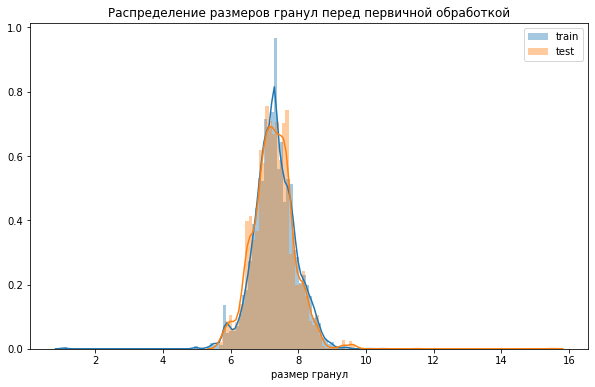

count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64
count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


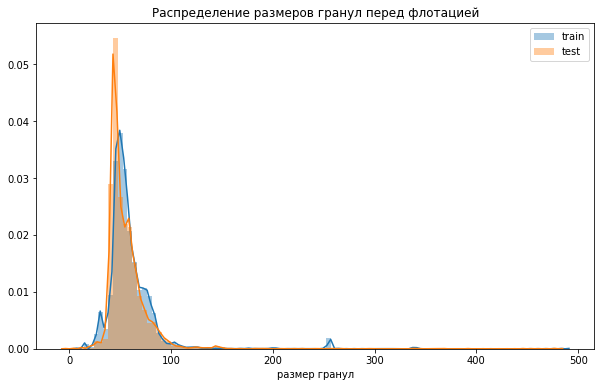

count    16860.000000
mean        60.177274
std         30.463943
min          9.659576
25%         47.549194
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    5856.000000
mean       55.889704
std        22.700347
min         0.046369
25%        43.852884
50%        49.964796
75%        61.615634
max       477.445473
Name: rougher.input.feed_size, dtype: float64


In [8]:
plt.figure(figsize = (10,6))
sns.distplot(train['primary_cleaner.input.feed_size'], bins = 100, kde = True, label = 'train')
sns.distplot(test['primary_cleaner.input.feed_size'], bins = 100, kde = True, label = 'test')
plt.legend()
plt.xlabel('размер гранул')
plt.title('Распределение размеров гранул перед первичной обработкой')
plt.show()
print(train['primary_cleaner.input.feed_size'].describe())
print(test['primary_cleaner.input.feed_size'].describe())

plt.figure(figsize = (10,6))
sns.distplot(train['rougher.input.feed_size'], bins = 100, kde = True, label = 'train')
sns.distplot(test['rougher.input.feed_size'], bins = 100, kde = True, label = 'test')
plt.legend()
plt.xlabel('размер гранул')
plt.title('Распределение размеров гранул перед флотацией')
plt.show()
print(train['rougher.input.feed_size'].describe())
print(test['rougher.input.feed_size'].describe())

При сравнении плотностей распределения размеров гранул отметил большое сходство значений в тренировочной и тествой выборках ( std = 0.616 и 0.611) и (mean = 7.28 и 7.25) что дает возможность говорить о правильности оценки модели для этих выборок. Такие же схожие значения дает и плотность распределения гранул перед флотацией (mean = 54.06 и 49.96, std = 30.46 и 22.70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 2 columns):
final.output.recovery      5291 non-null float64
rougher.output.recovery    5291 non-null float64
dtypes: float64(2)
memory usage: 82.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5291 entries, 0 to 5855
Data columns (total 84 columns):
final.output.concentrate_ag                           5291 non-null float64
final.output.concentrate_pb                           5291 non-null float64
final.output.concentrate_sol                          5291 non-null float64
final.output.concentrate_au                           5291 non-null float64
final.output.tail_ag                                  5291 non-null float64
final.output.tail_pb                                  5291 non-null float64
final.output.tail_sol                                 5291 non-null float64
final.output.tail_au                                  5291 non-null float64
primary_cleaner.input.sulfate_y         

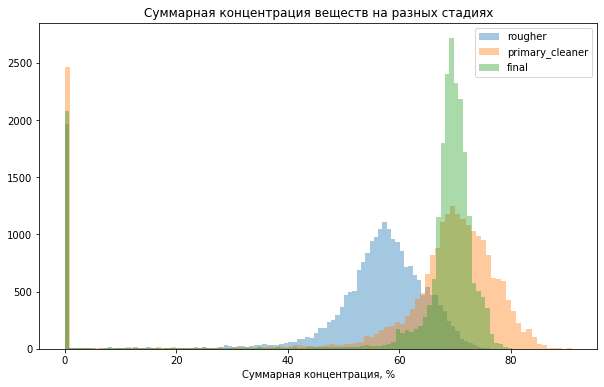

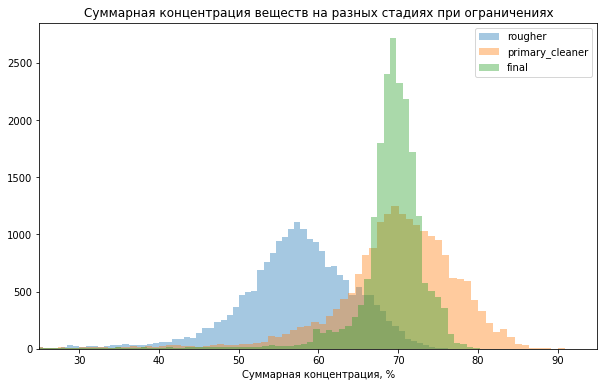

In [9]:
#Исследование суммарной концентрации веществ на различных стадиях обрабоки руды

#Расчет
full['rougher.input.feed_SUM'] = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_sol']
full['rougher.output.concentrate_SUM'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol']
full['final.output.concentrate_SUM'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_au'] + full['final.output.concentrate_sol']

#Выденление значений train из full 
train_with_sum = pd.DataFrame(columns = train.columns)
train_with_sum = train.merge(full, how = 'left', on='date')
cols_train = [c for c in train_with_sum.columns if c[len(c)-2:len(c)] != '_x']
train_with_sum=train_with_sum[cols_train]
#train_with_sum = train_with_sum.drop(['rougher.output.recovery_calculate'], axis = 1)

# Удаление выбросов (значений с низкой суммарной концентрацией веществ)
train = train_with_sum[train_with_sum['rougher.input.feed_SUM'] > 0.1]
train = train[train['rougher.output.concentrate_SUM'] > 0.1]
train = train[train['final.output.concentrate_SUM'] > 0.1]

#Выделение целевых признаков для тренировочной выборки и других информативных признаков
rougher_target_train = train['rougher.output.recovery_y']
final_target_train = train['final.output.recovery_y']
train = train.drop(['date', 'final.output.recovery_y', 'rougher.output.recovery_y','rougher.output.recovery_calculate',
                    'rougher.input.feed_SUM', 'rougher.output.concentrate_SUM','final.output.concentrate_SUM'], axis = 1)
# and train_with_sum['rougher.output.concentrate_SUM'] > 0.1 and train_with_sum['final.output.concentrate_SUM'] > 0.1)


#Выделение целевых признаков для тестовой выборки и других информативных признаков, Удаление выбросов
test_with_sum = pd.DataFrame(columns = test.columns)
test_with_sum = test.merge(full, how = 'left', on='date')
cols_test = [c for c in test_with_sum.columns if c[len(c)-2:len(c)] != '_x']
test_with_sum=test_with_sum[cols_test]
test = test_with_sum[test_with_sum['rougher.input.feed_SUM'] > 0.1]
test = test[test['rougher.output.concentrate_SUM'] > 0.1]
test = test[test['final.output.concentrate_SUM'] > 0.1]
rougher_target_test = test['rougher.output.recovery']
final_target_test = test['final.output.recovery']
#ols_test_2 = [c for c in test_with_sum.columns if c[len(c)-2:len(c)] == '_y']
#test = test[cols_test_2]
test = test.drop(['date', 'final.output.recovery', 'rougher.output.recovery',
                  'rougher.input.feed_SUM', 'rougher.output.concentrate_SUM','final.output.concentrate_SUM'], axis = 1)
target_test_end = full[['final.output.recovery','rougher.output.recovery']].loc[test.index].reset_index(drop=True)
target_test_end.info()
test.info()
# and test_with_sum['rougher.output.concentrate_SUM'] > 0.1 and test_with_sum['final.output.concentrate_SUM'] > 0.1)


#Визуальный анализ суммарных концентраций 
plt.figure(figsize = (10,6))
sns.distplot(full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_sol'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_au'] + full['final.output.concentrate_sol'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Суммарная концентрация, %')
plt.title('Суммарная концентрация веществ на разных стадиях')
plt.show()
plt.figure(figsize = (10,6))
sns.distplot(full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_sol'], bins = 100, kde = False, label = 'rougher')
sns.distplot(full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'], bins = 100, kde = False, label = 'primary_cleaner')
sns.distplot(full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_au'] + full['final.output.concentrate_sol'], bins = 100, kde = False, label = 'final')
plt.legend()
plt.xlabel('Суммарная концентрация, %')
plt.xlim([25,95])
plt.title('Суммарная концентрация веществ на разных стадиях при ограничениях')
plt.show()

   Для всех стадий характерно большое количество значений, где суммарная концентация веществ близка к 0. Данные значения стоит удалить, поскольку они могут в существенной мере повлиять на качество предсказания, и на проверку значений для тестовой выборки. Также на данном этапе произвели удаление неинформативных признаков и полей посчитанных на предыдущих стадиях. Проведя анализ графиков, стоит отметить значительный рост показателей концентрации от флотации к вторичной обработке. Доля рассматриваемых веществ в руде с каждым этапом становится больше. Для этапа первичной обработки и финальной обработки пики наблюдаются на значениях около 70%, однако дисперсия для этапа првичной обработки выше.

# 3. Модель

In [10]:
target_test_end.info()

# Масштабирование признаков
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)

# Выделение отдельно фичей, известных на этапе финальной обработки и на этапе флотации для train
final_feature_train = pd.DataFrame(data = train_scaled, columns = train.columns)  
final_feature_train.info()
rougher_feature_train = final_feature_train[['rougher.calculation.sulfate_to_au_concentrate_y',
'rougher.calculation.floatbank10_sulfate_to_au_feed_y',  
'rougher.calculation.floatbank11_sulfate_to_au_feed_y',    
'rougher.calculation.au_pb_ratio_y',                       
'rougher.input.feed_ag_y',                               
'rougher.input.feed_pb_y',                              
'rougher.input.feed_rate_y',                             
'rougher.input.feed_size_y',                             
'rougher.input.feed_sol_y',                              
'rougher.input.feed_au_y',                               
'rougher.input.floatbank10_sulfate_y',                   
'rougher.input.floatbank10_xanthate_y',                  
'rougher.input.floatbank11_sulfate_y',                   
'rougher.input.floatbank11_xanthate_y',                  
'rougher.output.concentrate_ag_y',                         
'rougher.output.concentrate_pb_y',                        
'rougher.output.concentrate_sol_y',                        
'rougher.output.concentrate_au_y',                         
'rougher.output.tail_ag_y',                                
'rougher.output.tail_pb_y',                                
'rougher.output.tail_sol_y',                               
'rougher.output.tail_au_y',                                
'rougher.state.floatbank10_a_air_y',                     
'rougher.state.floatbank10_a_level_y',                   
'rougher.state.floatbank10_b_air_y',                     
'rougher.state.floatbank10_b_level_y',                   
'rougher.state.floatbank10_c_air_y',                     
'rougher.state.floatbank10_c_level_y',                   
'rougher.state.floatbank10_d_air_y',                     
'rougher.state.floatbank10_d_level_y',                   
'rougher.state.floatbank10_e_air_y',                     
'rougher.state.floatbank10_e_level_y',                   
'rougher.state.floatbank10_f_air_y',                     
'rougher.state.floatbank10_f_level_y']]
display(final_feature_train.head())
display(rougher_feature_train.head())
final_feature_train.info()
rougher_feature_train.info()


# Выделение отдельно фичей, известных на этапе финальной обработки и на этапе флотации для test
scaler.fit(test)
test_scaled = scaler.transform(test)
final_feature_test = pd.DataFrame(data = test_scaled, columns = test.columns)
final_feature_test = final_feature_test.rename(columns={'final.output.concentrate_ag':'final.output.concentrate_ag_y',
'final.output.concentrate_pb':'final.output.concentrate_pb_y',                       
'final.output.concentrate_sol':'final.output.concentrate_sol_y',                      
'final.output.concentrate_au':'final.output.concentrate_au_y',                      
'final.output.tail_ag':'final.output.tail_ag_y',                              
'final.output.tail_pb':'final.output.tail_pb_y',                              
'final.output.tail_sol':'final.output.tail_sol_y',                             
'final.output.tail_au':'final.output.tail_au_y',                              
'primary_cleaner.output.concentrate_ag':'primary_cleaner.output.concentrate_ag_y',             
'primary_cleaner.output.concentrate_pb':'primary_cleaner.output.concentrate_pb_y',             
'primary_cleaner.output.concentrate_sol':'primary_cleaner.output.concentrate_sol_y',            
'primary_cleaner.output.concentrate_au':'primary_cleaner.output.concentrate_au_y',             
'primary_cleaner.output.tail_ag':'primary_cleaner.output.tail_ag_y',                    
'primary_cleaner.output.tail_pb':'primary_cleaner.output.tail_pb_y',                    
'primary_cleaner.output.tail_sol':'primary_cleaner.output.tail_sol_y',                   
'primary_cleaner.output.tail_au':'primary_cleaner.output.tail_au_y',
'rougher.calculation.sulfate_to_au_concentrate':'rougher.calculation.sulfate_to_au_concentrate_y',     
'rougher.calculation.floatbank10_sulfate_to_au_feed':'rougher.calculation.floatbank10_sulfate_to_au_feed_y',
'rougher.calculation.floatbank11_sulfate_to_au_feed':'rougher.calculation.floatbank11_sulfate_to_au_feed_y',
'rougher.calculation.au_pb_ratio':'rougher.calculation.au_pb_ratio_y',
'rougher.output.concentrate_ag':'rougher.output.concentrate_ag_y',                     
'rougher.output.concentrate_pb':'rougher.output.concentrate_pb_y',                    
'rougher.output.concentrate_sol':'rougher.output.concentrate_sol_y',                    
'rougher.output.concentrate_au':'rougher.output.concentrate_au_y',                     
'rougher.output.tail_ag':'rougher.output.tail_ag_y',                           
'rougher.output.tail_pb':'rougher.output.tail_pb_y',                            
'rougher.output.tail_sol':'rougher.output.tail_sol_y',                           
'rougher.output.tail_au':'rougher.output.tail_au_y',
'secondary_cleaner.output.tail_ag':'secondary_cleaner.output.tail_ag_y',                  
'secondary_cleaner.output.tail_pb':'secondary_cleaner.output.tail_pb_y',                  
'secondary_cleaner.output.tail_sol':'secondary_cleaner.output.tail_sol_y',                 
'secondary_cleaner.output.tail_au':'secondary_cleaner.output.tail_au_y'})
rougher_feature_test = final_feature_test[['rougher.calculation.sulfate_to_au_concentrate_y',
                                           'rougher.calculation.floatbank10_sulfate_to_au_feed_y',  
                                           'rougher.calculation.floatbank11_sulfate_to_au_feed_y',    
                                           'rougher.calculation.au_pb_ratio_y',                       
                                           'rougher.input.feed_ag_y',                               
                                           'rougher.input.feed_pb_y',                              
                                           'rougher.input.feed_rate_y',                             
                                           'rougher.input.feed_size_y',                             
                                           'rougher.input.feed_sol_y',                              
                                           'rougher.input.feed_au_y',                               
                                           'rougher.input.floatbank10_sulfate_y',                   
                                           'rougher.input.floatbank10_xanthate_y',                  
                                           'rougher.input.floatbank11_sulfate_y',                   
                                           'rougher.input.floatbank11_xanthate_y',                  
                                           'rougher.output.concentrate_ag_y',                         
                                           'rougher.output.concentrate_pb_y',                        
                                           'rougher.output.concentrate_sol_y',                        
                                           'rougher.output.concentrate_au_y',                         
                                           'rougher.output.tail_ag_y',                                
                                           'rougher.output.tail_pb_y',                                
                                           'rougher.output.tail_sol_y',                               
                                           'rougher.output.tail_au_y',                                
                                           'rougher.state.floatbank10_a_air_y',                     
                                           'rougher.state.floatbank10_a_level_y',                   
                                           'rougher.state.floatbank10_b_air_y',                     
                                           'rougher.state.floatbank10_b_level_y',                   
                                           'rougher.state.floatbank10_c_air_y',                     
                                           'rougher.state.floatbank10_c_level_y',                   
                                           'rougher.state.floatbank10_d_air_y',                     
                                           'rougher.state.floatbank10_d_level_y',                   
                                           'rougher.state.floatbank10_e_air_y',                     
                                           'rougher.state.floatbank10_e_level_y',                   
                                           'rougher.state.floatbank10_f_air_y',                     
                                           'rougher.state.floatbank10_f_level_y']]



display(final_feature_test.head())
display(rougher_feature_test.head()) 
final_feature_test.info()
rougher_feature_test.info()


#Функция для расчета метрики
def smape (target, predict):
    predict = pd.Series(predict, index = target.index)
    res = (target - predict).abs()
    res /= (target.abs() + predict.abs())/2 
    return res.mean()

def smape_itog (target, predict):
    smape_rougher = smape(target.iloc[:,0],predict[:,0])
    smape_final = smape(target.iloc[:,1],predict[:,1])
    return smape_rougher*0.25 + smape_final*0.75 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 2 columns):
final.output.recovery      5291 non-null float64
rougher.output.recovery    5291 non-null float64
dtypes: float64(2)
memory usage: 82.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14621 entries, 0 to 14620
Data columns (total 84 columns):
final.output.concentrate_ag_y                           14621 non-null float64
final.output.concentrate_pb_y                           14621 non-null float64
final.output.concentrate_sol_y                          14621 non-null float64
final.output.concentrate_au_y                           14621 non-null float64
final.output.tail_ag_y                                  14621 non-null float64
final.output.tail_pb_y                                  14621 non-null float64
final.output.tail_sol_y                                 14621 non-null float64
final.output.tail_au_y                                  14621 non-null float64
primary_cleane

,final.output.concentrate_ag_y,final.output.concentrate_pb_y,final.output.concentrate_sol_y,final.output.concentrate_au_y,final.output.tail_ag_y,final.output.tail_pb_y,final.output.tail_sol_y,final.output.tail_au_y,primary_cleaner.input.sulfate_y,primary_cleaner.input.depressant_y,...,secondary_cleaner.state.floatbank4_a_air_y,secondary_cleaner.state.floatbank4_a_level_y,secondary_cleaner.state.floatbank4_b_air_y,secondary_cleaner.state.floatbank4_b_level_y,secondary_cleaner.state.floatbank5_a_air_y,secondary_cleaner.state.floatbank5_a_level_y,secondary_cleaner.state.floatbank5_b_air_y,secondary_cleaner.state.floatbank5_b_level_y,secondary_cleaner.state.floatbank6_a_air_y,secondary_cleaner.state.floatbank6_a_level_y
0,0.563958,-0.152027,-1.232127,-0.358549,0.314543,-1.671158,2.067795,-0.823318,-0.140158,0.368796,...,-1.031413,-0.446391,-0.636014,-0.728015,-1.152950,-0.352598,-0.861369,-0.396941,-0.927969,-2.520956
1,0.546123,-0.102362,-1.317390,-0.250330,0.335558,-1.639494,1.983524,-0.739636,-0.175560,0.417243,...,-1.035699,-0.504157,-0.664390,-0.671205,-1.133555,-0.399636,-0.877881,-0.399672,-0.954472,-2.366508
2,0.564316,0.051117,-1.274347,-0.259701,0.353945,-1.613511,1.850562,-0.705911,-0.219352,0.711471,...,-1.031730,-0.447021,-0.671559,-0.667879,-1.128149,-0.398603,-0.872815,-0.398085,-0.949221,-2.408346
3,0.558871,-0.097305,-1.453769,-0.252838,0.319018,-1.682717,1.951763,-0.819532,-0.256855,0.713162,...,-1.027978,-0.415150,-0.655079,-0.668891,-1.145314,-0.375144,-0.879174,-0.391658,-0.953225,-2.371837
4,0.627802,0.006346,-1.426168,-0.234931,0.293136,-1.772682,1.949530,-0.913217,-0.360489,0.883773,...,-1.029586,-0.395634,-0.663907,-0.666545,-1.152937,-0.437998,-0.893629,-0.394118,-0.954768,-2.410114


,rougher.calculation.sulfate_to_au_concentrate_y,rougher.calculation.floatbank10_sulfate_to_au_feed_y,rougher.calculation.floatbank11_sulfate_to_au_feed_y,rougher.calculation.au_pb_ratio_y,rougher.input.feed_ag_y,rougher.input.feed_pb_y,rougher.input.feed_rate_y,rougher.input.feed_size_y,rougher.input.feed_sol_y,rougher.input.feed_au_y,...,rougher.state.floatbank10_b_air_y,rougher.state.floatbank10_b_level_y,rougher.state.floatbank10_c_air_y,rougher.state.floatbank10_c_level_y,rougher.state.floatbank10_d_air_y,rougher.state.floatbank10_d_level_y,rougher.state.floatbank10_e_air_y,rougher.state.floatbank10_e_level_y,rougher.state.floatbank10_f_air_y,rougher.state.floatbank10_f_level_y
0,-0.001565,0.006735,0.037213,0.532136,-1.270347,-1.094648,0.503542,-0.207487,0.163010,-0.692167,...,1.501244,0.532542,1.405229,0.421662,1.815804,0.278702,1.674531,0.188303,2.121633,0.242419
1,-0.001169,0.009542,0.032766,0.554816,-1.239809,-1.111310,0.519256,-0.140186,-0.023796,-0.695878,...,1.489302,0.270475,1.396497,0.285885,1.823229,0.302643,1.647243,0.268376,2.029044,0.274422
2,-0.001248,0.009031,0.034579,0.651951,-1.262263,-1.205218,0.561923,-0.131474,0.014841,-0.752937,...,1.481802,0.269528,1.392780,0.283680,1.820062,0.302633,1.647003,0.284628,2.032367,0.267248
3,-0.001221,0.009577,0.034111,0.714873,-1.299041,-1.312720,0.675112,-0.120880,0.172507,-0.872603,...,1.485623,0.259013,1.394346,0.284463,1.810145,0.299491,1.656171,0.283014,2.031911,0.280191
4,-0.000990,0.008938,0.035212,0.901654,-1.290188,-1.534169,0.656566,-0.186434,-0.272654,-1.095467,...,1.486414,0.276560,1.395935,0.282257,1.819641,0.303426,1.659385,0.303114,2.037062,0.269357


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14621 entries, 0 to 14620
Data columns (total 84 columns):
final.output.concentrate_ag_y                           14621 non-null float64
final.output.concentrate_pb_y                           14621 non-null float64
final.output.concentrate_sol_y                          14621 non-null float64
final.output.concentrate_au_y                           14621 non-null float64
final.output.tail_ag_y                                  14621 non-null float64
final.output.tail_pb_y                                  14621 non-null float64
final.output.tail_sol_y                                 14621 non-null float64
final.output.tail_au_y                                  14621 non-null float64
primary_cleaner.input.sulfate_y                         14621 non-null float64
primary_cleaner.input.depressant_y                      14621 non-null float64
primary_cleaner.input.feed_size_y                       14621 non-null float64
primary_cleaner.input.

,final.output.concentrate_ag_y,final.output.concentrate_pb_y,final.output.concentrate_sol_y,final.output.concentrate_au_y,final.output.tail_ag_y,final.output.tail_pb_y,final.output.tail_sol_y,final.output.tail_au_y,primary_cleaner.input.sulfate_y,primary_cleaner.input.depressant_y,...,secondary_cleaner.state.floatbank4_a_air_y,secondary_cleaner.state.floatbank4_a_level_y,secondary_cleaner.state.floatbank4_b_air_y,secondary_cleaner.state.floatbank4_b_level_y,secondary_cleaner.state.floatbank5_a_air_y,secondary_cleaner.state.floatbank5_a_level_y,secondary_cleaner.state.floatbank5_b_air_y,secondary_cleaner.state.floatbank5_b_level_y,secondary_cleaner.state.floatbank6_a_air_y,secondary_cleaner.state.floatbank6_a_level_y
0,1.705524,0.556181,0.652442,-0.763072,1.182127,1.027304,0.137103,1.315230,0.828662,2.053724,...,-1.276169,0.233880,-1.735108,-0.454713,-1.648006,4.272781,-1.815211,-0.140413,2.075601,0.042415
1,1.881414,0.633874,0.740882,-1.002541,1.241816,1.118123,0.159716,1.469414,0.933592,2.051894,...,-1.266073,0.204817,-1.700919,-0.434901,-1.644090,-1.559415,-1.812952,-0.144113,1.701050,0.039529
2,1.739148,0.527587,0.779181,-0.767212,1.305073,1.249386,0.103245,1.642331,0.930564,1.370659,...,-1.294031,0.202501,-1.711113,-0.449185,-1.606374,0.002001,-1.803592,-0.134226,1.695479,0.018464
3,2.433172,0.581164,1.077941,-1.068376,1.081315,0.949626,0.168862,1.800546,0.932308,1.086139,...,-1.273385,0.215953,-1.717676,-0.432988,-1.664551,-0.002167,-1.794231,-0.138227,1.685272,0.068630
4,2.079330,0.391466,0.842681,-0.865905,0.815775,0.768653,0.266901,2.123450,0.561245,0.657066,...,-1.275640,0.137297,-1.723738,-0.444039,-1.594056,-0.542110,-1.784871,-0.149966,1.697361,0.012332


,rougher.calculation.sulfate_to_au_concentrate_y,rougher.calculation.floatbank10_sulfate_to_au_feed_y,rougher.calculation.floatbank11_sulfate_to_au_feed_y,rougher.calculation.au_pb_ratio_y,rougher.input.feed_ag_y,rougher.input.feed_pb_y,rougher.input.feed_rate_y,rougher.input.feed_size_y,rougher.input.feed_sol_y,rougher.input.feed_au_y,...,rougher.state.floatbank10_b_air_y,rougher.state.floatbank10_b_level_y,rougher.state.floatbank10_c_air_y,rougher.state.floatbank10_c_level_y,rougher.state.floatbank10_d_air_y,rougher.state.floatbank10_d_level_y,rougher.state.floatbank10_e_air_y,rougher.state.floatbank10_e_level_y,rougher.state.floatbank10_f_air_y,rougher.state.floatbank10_f_level_y
0,-1.735336,-1.273822,-1.204182,-0.672882,1.923365,1.888771,0.015183,0.281643,0.765740,1.669977,...,-0.447868,1.647195,-0.304306,1.624655,-0.090739,1.569155,-0.434031,1.161228,-0.378134,1.175055
1,-0.928075,-0.486725,-0.471556,-0.651561,1.876276,1.774662,0.018001,0.247674,0.621967,1.569984,...,-0.456430,1.628965,-0.305676,1.619589,-0.078847,1.559781,-0.430011,1.161891,-0.373197,1.051147
2,-0.884360,-0.536793,-0.519942,-0.534993,1.928387,1.672042,0.013590,0.471750,0.855989,1.674355,...,-0.462516,1.622045,-0.313262,1.588341,-0.082794,1.542262,-0.430592,1.166169,-0.372258,1.131342
3,-0.976630,-0.667577,-0.623775,-0.284106,1.551886,1.350477,-0.104258,0.152685,0.599965,1.729016,...,-0.437769,1.657027,-0.299993,1.617080,-0.084785,1.610167,-0.415381,1.145990,-0.369027,1.148630
4,-0.983004,-1.022523,-0.923046,-0.305997,1.004371,0.992227,0.001172,0.309065,0.635966,1.189359,...,-0.097761,1.638412,0.024785,1.632146,0.179478,1.540479,0.016338,1.170350,-0.377518,1.157188


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 84 columns):
final.output.concentrate_ag_y                           5291 non-null float64
final.output.concentrate_pb_y                           5291 non-null float64
final.output.concentrate_sol_y                          5291 non-null float64
final.output.concentrate_au_y                           5291 non-null float64
final.output.tail_ag_y                                  5291 non-null float64
final.output.tail_pb_y                                  5291 non-null float64
final.output.tail_sol_y                                 5291 non-null float64
final.output.tail_au_y                                  5291 non-null float64
primary_cleaner.input.sulfate_y                         5291 non-null float64
primary_cleaner.input.depressant_y                      5291 non-null float64
primary_cleaner.input.feed_size_y                       5291 non-null float64
primary_cleaner.input.xanthate_y   

In [11]:
#выделение выборок для обучения и валидации 
final_rougher_target_train = pd.concat([final_target_train, rougher_target_train], axis=1)
final_feature_train_split, final_feature_valid_split, final_rougher_target_train_split, final_rougher_target_valid_split = train_test_split(final_feature_train,final_rougher_target_train, test_size = 0.25, random_state = 12345)
test_end = test[['primary_cleaner.input.sulfate_y',    
'primary_cleaner.input.depressant_y',    
'primary_cleaner.input.feed_size_y',
'primary_cleaner.input.xanthate_y',
'primary_cleaner.state.floatbank8_a_air_y',
'primary_cleaner.state.floatbank8_a_level_y',
'primary_cleaner.state.floatbank8_b_air_y',
'primary_cleaner.state.floatbank8_b_level_y',
'primary_cleaner.state.floatbank8_c_air_y',
'primary_cleaner.state.floatbank8_c_level_y',
'primary_cleaner.state.floatbank8_d_air_y',
'primary_cleaner.state.floatbank8_d_level_y',
'rougher.input.feed_ag_y',
'rougher.input.feed_pb_y',
'rougher.input.feed_rate_y',
'rougher.input.feed_size_y',
'rougher.input.feed_sol_y',
'rougher.input.feed_au_y',
'rougher.input.floatbank10_sulfate_y',
'rougher.input.floatbank10_xanthate_y',
'rougher.input.floatbank11_sulfate_y',
'rougher.input.floatbank11_xanthate_y',
'rougher.state.floatbank10_a_air_y',
'rougher.state.floatbank10_a_level_y',
'rougher.state.floatbank10_b_air_y',
'rougher.state.floatbank10_b_level_y',
'rougher.state.floatbank10_c_air_y',
'rougher.state.floatbank10_c_level_y',
'rougher.state.floatbank10_d_air_y',
'rougher.state.floatbank10_d_level_y',
'rougher.state.floatbank10_e_air_y',
'rougher.state.floatbank10_e_level_y',
'rougher.state.floatbank10_f_air_y',
'rougher.state.floatbank10_f_level_y',
'secondary_cleaner.state.floatbank2_a_air_y',
'secondary_cleaner.state.floatbank2_a_level_y',
'secondary_cleaner.state.floatbank2_b_air_y',
'secondary_cleaner.state.floatbank2_b_level_y',
'secondary_cleaner.state.floatbank3_a_air_y',
'secondary_cleaner.state.floatbank3_a_level_y',
'secondary_cleaner.state.floatbank3_b_air_y',
'secondary_cleaner.state.floatbank3_b_level_y',
'secondary_cleaner.state.floatbank4_a_air_y',
'secondary_cleaner.state.floatbank4_a_level_y',
'secondary_cleaner.state.floatbank4_b_air_y',
'secondary_cleaner.state.floatbank4_b_level_y',
'secondary_cleaner.state.floatbank5_a_air_y',
'secondary_cleaner.state.floatbank5_a_level_y',
'secondary_cleaner.state.floatbank5_b_air_y',
'secondary_cleaner.state.floatbank5_b_level_y',
'secondary_cleaner.state.floatbank6_a_air_y',
'secondary_cleaner.state.floatbank6_a_level_y']]
test_end_feature_train, test_end_feature_valid, test_end_target_train, test_end_target_valid = train_test_split(test_end, target_test_end, test_size = 0.25, random_state = 12345)
#rougher_feature_train_split, rougher_feature_valid_split, rougher_target_train_split, rougher_target_valid_split = train_test_split(rougher_feature_train,
#                                                                                                                            rougher_target_train, test_size = 0.25, random_state = 12345)

print('================================== НОВЫЙ КОД : ВЫДЕЛЕНИЕ ТЕСТОВОЙ ВЫБОРКИ==================================')

test_control= pd.read_csv('/datasets/gold_recovery_test.csv')
full_control= pd.read_csv('/datasets/gold_recovery_full.csv')
test_control = test_control.ffill(axis = 0)
test_control = test_control.ffill(axis = 1)
full_control = full_control.ffill(axis = 0)
full_control = full_control.ffill(axis = 1)
test_control['date'] = pd.to_datetime(test_control['date'], format = '%Y-%m-%d %H:%M:%S')
full_control['date'] = pd.to_datetime(full_control['date'], format = '%Y-%m-%d %H:%M:%S')
full_control['rougher.input.feed_SUM'] = full_control['rougher.input.feed_ag'] + full_control['rougher.input.feed_pb'] + full_control['rougher.input.feed_au'] + full_control['rougher.input.feed_sol']
full_control['rougher.output.concentrate_SUM'] = full_control['rougher.output.concentrate_ag'] + full_control['rougher.output.concentrate_pb'] + full_control['rougher.output.concentrate_au'] + full_control['rougher.output.concentrate_sol']
full_control['final.output.concentrate_SUM'] = full_control['final.output.concentrate_ag'] + full_control['final.output.concentrate_pb'] + full_control['final.output.concentrate_au'] + full_control['final.output.concentrate_sol']
full_control_test_index = pd.DataFrame(data = full_control, columns = full_control.columns, index = test_control.index)
full_control_test_index.info()
full_control_test_index = full_control_test_index[full_control_test_index['rougher.input.feed_SUM'] > 0.1]
full_control_test_index = full_control_test_index[full_control_test_index['rougher.output.concentrate_SUM'] > 0.1]
full_control_test_index = full_control_test_index[full_control_test_index['final.output.concentrate_SUM'] > 0.1]
final_rougher_target_test_end = full_control_test_index[['final.output.recovery','rougher.output.recovery']]
final_rougher_target_test_end.info()    
full_control_test_index.info()
print(full_control_test_index.columns)
test_end = full_control_test_index.drop(['rougher.input.feed_SUM', 'rougher.output.concentrate_SUM', 'final.output.concentrate_SUM','date','final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au'], axis = 1)
test_end.info()
scaler = StandardScaler()
scaler.fit(test_end[test_end.columns])
test_end[test_end.columns] = scaler.transform(test_end[test_end.columns])

print('================================== НОВЫЙ КОД : ВЫДЕЛЕНИЕ ТЕСТОВОЙ ВЫБОРКИ==================================')

#Поиск лучшей модели 
model_1 = RandomForestRegressor()
smape_scorerrr = make_scorer(smape_itog, greater_is_better=False)
grid = GridSearchCV(estimator = model_1,
                                param_grid={'n_estimators': [i for i in range(1, 5)], 'max_depth' : [c for c in range(1, 10)],
                                           'random_state': [12345]},
                                scoring = smape_scorerrr, cv = 5) 
model = grid.fit(final_feature_train_split, final_rougher_target_train_split)
print(grid.best_params_)
print("Для случайного леса наилучшее значение smape", grid.best_score_,'достигается при', grid.best_params_)
print("---------------------------------------------")
model = grid.fit(final_feature_valid_split, final_rougher_target_valid_split)
print("Для случайного леса по валидационным данным значение smape", grid.best_score_)
print("---------------------------------------------")
model = grid.fit(test_end, final_rougher_target_test_end)
print("Для случайного леса по тестовым данным значение smape", grid.best_score_)
print("---------------------------------------------")
model = LinearRegression()
grid = GridSearchCV(estimator = model,
                                param_grid={},
                                scoring = smape_scorerrr, cv = 5) 
model_2 = grid.fit(final_feature_train_split, final_rougher_target_train_split)
print("Для линейной регрессии наилучшее значение smape", grid.best_score_)
print("---------------------------------------------")
model = grid.fit(final_feature_valid_split, final_rougher_target_valid_split)
print("Для линейной регрессии по валидационным данным значение smape", grid.best_score_)
print("---------------------------------------------")

================================== НОВЫЙ КОД : ВЫДЕЛЕНИЕ ТЕСТОВОЙ ВЫБОРКИ==================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 90 columns):
date                                                  5856 non-null datetime64[ns]
final.output.concentrate_ag                           5856 non-null object
final.output.concentrate_pb                           5856 non-null object
final.output.concentrate_sol                          5856 non-null object
final.output.concentrate_au                           5856 non-null object
final.output.recovery                                 5856 non-null object
final.output.tail_ag                                  5856 non-null object
final.output.tail_pb                                  5856 non-null object
final.output.tail_sol                                 5856 non-null object
final.output.tail_au                                  5856 non-null object
primary_cleaner.input.sulfa

In [13]:
#Проверка работы модели на валидационных и тестовых данных
model = LinearRegression()
grid = GridSearchCV(estimator = model,
                                param_grid={},
                                scoring = smape_scorerrr, cv = 5) 
model_2 = grid.fit(final_feature_valid_split, final_rougher_target_valid_split)
print("Для логистической регрессии по валидационным данным значение smape", grid.best_score_)
print('По валидационным данным через кросс-валидацию значения smape',cross_val_score(model_2, final_feature_valid_split, final_rougher_target_valid_split, cv = 5, scoring = smape_scorerrr))
print("---------------------------------------------")
model_2 = grid.fit(test_end, final_rougher_target_test_end)
print("Для логистической регрессии по тестовым данным значение smape", grid.best_score_)
print('По тестовым данным через кросс-валидацию значения smape',cross_val_score(model_2, test_end, final_rougher_target_test_end, cv = 5, scoring = smape_scorerrr))      
print("---------------------------------------------")


Для логистической регрессии по валидационным данным значение smape -0.03119605356562185
По валидационным данным через кросс-валидацию значения smape [-0.03243922 -0.02689693 -0.02983873 -0.03514007 -0.03166361]
---------------------------------------------
Для логистической регрессии по тестовым данным значение smape -0.10387575768622645
По тестовым данным через кросс-валидацию значения smape [-0.15538426 -0.10817737 -0.07519727 -0.11335309 -0.06724053]
---------------------------------------------


In [16]:
model = DummyRegressor(strategy = 'mean')
model.fit(final_feature_train_split, final_rougher_target_train_split)
predict_values = model.predict(test_end)
print(smape_scorerrr(model, test_end, final_rougher_target_test_end))
print(smape_itog(final_rougher_target_test_end, predict_values))

-0.09882035891046759
0.09882035891046759


При проверке с помощью метода gridsearchCV одновременно производилась оценка модели с использованием метода кросс-валидации (разбивали выборку на 5 блоков). Линейной регрессия показала себя незначительно лучше случайного леса (0.032 против 0.034). Еще одно преимущество оказалось в скорости обучения. На валидационной выборке тенденция сохранилась - все также лучше выглядела модель на основе алгоритма линейной регрессии. Формирование признаков для разных этапов обогащения представило серьезную сложность, поскольку в идеале на этапе флотации ('rougher') известны фичи только для этого этапа, а для подсчета и оценки финальной эффективности обогащения используются практически все фичи. При разделении фич и отдельной оценке параметров на разных этапах возникает сложность вычисления конечной метрики smape. В результате были взяты все имеющиеся фичи и произвдено пострение общей модели для параметров rougher.output.recovery и final.output.recovery С чем возможно и связан значительный рост метрики при проверке модели на тестовых данных, в 3 раза (0.1038). При этомзначений метрики для характеристики случайного леса 0.0876.   

# Выводы по проекту

В ходе выполнения проекта анализировались данные по эффективности обогащения золотосодержащей руды. Стояла задача по разработке модели предсказания даннойогопараметра, причем на различных этапах тех процесса. Данные были разбиты на 3 таблицы, 1 из которых (test) содержала значительно меньше признаков, чем 2 другие, а еще одна (full) содержала данные из 2-х других (и даже больше).  Произведена оценка качества расчета характеристики "rougher.output.recovery" и связи величины с другими табличными данными. Оценены фичи, отсутствующие в датасете test и оценены данные, которые в них находились. Все это либо расчитываемые занные, либо данные от финальных стадий техпроцесса обработки золота. Произведена предобработка данных, для удобства индексировния и связи данных между таблицами преодразован тип данных поля 'date', а также удалены выбросы по нулевым значениям концентраций поступающей руды. Отсутствующие значения преобразованы в соответствии с реальным техпроцессом и заменены средним значением между соседними, поскольку являются наиболее близкими по значению во временном интервале. Произведено масштабирование признаков для выборок, выделение целевых признаков и наиболее инфрмативных фичей в различные датасеты. Описано различие в концентрации металлов на разных стадиях. Заметно, что концентрация золота растет, серебра - падает, а для свинца подвержена наименьшим изменениям. Осуществялось сравение размеров гранул сырья на тестовой и тренировочной выборках. В целом можно отметить схожесь плотностнй распределений и максимльные значения на одинаковых значениях, дисперсия больше на тренировочных данных, но их и самих в 3 раза больше. Такжен оценена суммарная концентрация веществ на разных стадиях выделения золота. При анализе гистограмм отмечается резкий всплеск значений с нулевой концентрацией веществ. Такие значения будут способствовать ухудшению обучения и конечному предсказанию параметров обогащения. В результате данные значения были удалены. В качестве метрики оценки работы модели вычислена характеристика smape. Проведен подбор модели по данной характеристике с использованием методов gridsearch и cross-validation. Наилучшим образом на тренировочных и валидационных данных себя показала модель линейной регрессии, хотя на тестовых данных лучше отработал случайный лес с параметрами max_depth': 9 и 'n_estimators': 4 (smape 0.159 против 0.214 у линейного алгоритма). Данная ситуация возможна из-за отсутствия в тестовой выборке более 30 значений параметров, что негативно сказалось на обученной на больших признаках модели.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке